In [ ]:
from selenium import webdriver
from time import sleep
import csv

driver = webdriver.Chrome()
driver.get("https://finance.yahoo.com/quote/YM%3DF/history?period1=1572220800&period2=1585353600")

data = driver.find_elements_by_xpath("//div/table/tbody/tr")
title = driver.find_elements_by_xpath("//div/table/thead/tr")

title_1 = []
for i in title:
    x = i.text.split()
    title_1.append(x)

with open("Dow.csv", "a+", newline="", encoding="UTF-8") as f:
    writer = csv.writer(f)
    T = [title_1[0][0].strip(), title_1[0][1].strip(), 
        title_1[0][2].strip(), title_1[0][3].strip(),
        title_1[0][4].strip(), title_1[0][7].strip()]
    writer.writerow(T)

for d in data:
    da = d.text.split('\n')
    # ['Mar 29, 2020 20,926.00 21,244.00 20,778.00 21,213.00 21,213.00 711,107']
    for i in da:
        info = i.split(" ")
        # ['Mar', '29,', '2020', '20,926.00', '21,244.00', '20,778.00', '21,213.00', '21,213.00', '711,107']
        date = info[2] + "-" + info[0] + "-" + info[1]
        Open = info[3]
        high = info[4]
        low = info [5]
        close = info[6]
        vol = info[8]
        with open("Dow.csv", "a+", newline="", encoding="UTF-8") as f:
            writer = csv.writer(f)
            L = [date.strip(), Open.strip(), 
                high.strip(), low.strip(), 
                close.strip(), vol.strip()]
            writer.writerow(L)

sleep(5)

f.close()

driver.quit()

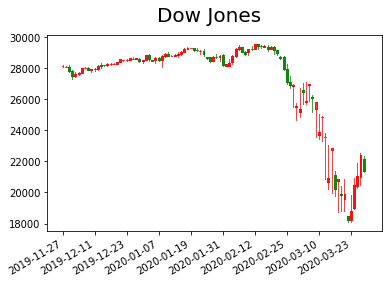

In [5]:
import matplotlib.pyplot as mp
import matplotlib.dates as md
import matplotlib.ticker as mt
from mpl_finance import candlestick2_ochl
import pandas as pd
import datetime as dt
%matplotlib inline

data = pd.read_csv("Dow1.csv")
data = data.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close*':'close', 'Volume':'vol'})

Time = []
for i in sorted(range(data.Date.shape[0]), reverse=True):
    dmy = data['Date'][i].replace(",", "")
    dmy = dmy.split('\n')
    time = dt.datetime.strptime(dmy[0], "%Y-%b-%d").date()
    Time.append(time)

data["Date"] = pd.to_datetime(data['Date'])
data = data.sort_values(by="Date")
data.reset_index(inplace=True)
del data['index']

# 開始畫圖
fig = mp.figure()
fig.suptitle("Dow Jones", fontsize=20)

ax1 = mp.subplot(111)
ax1.set_xticks(range(0, len(Time),10))
ax1.set_xticklabels(Time[::10])

candlestick2_ochl(ax1, data['open'], data['close'], data['high'], data['low'], 
                  width=0.6, colorup='r', colordown='g', alpha=0.75)

mp.gcf().autofmt_xdate()
mp.show()